# Loan Prediction

## Data Cleaning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [4]:
df = pd.read_csv('Training Data.csv')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [5]:
df.index
df.dtypes
df.shape

RangeIndex(start=0, stop=252000, step=1)

Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

(252000, 13)

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [7]:
df = df.drop('Id',axis=1)

#check for null
df.isnull().values.any()

False

In [8]:
# Change categorical data to numerical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Married/Single'] = label_encoder.fit_transform(df['Married/Single']) 
df['House_Ownership'] = label_encoder.fit_transform(df['House_Ownership'])
df['Car_Ownership'] = label_encoder.fit_transform(df['Car_Ownership'])
df['Profession'] = label_encoder.fit_transform(df['Profession'])
df['CITY'] = label_encoder.fit_transform(df['CITY'])
df['STATE'] = label_encoder.fit_transform(df['STATE'])
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,251,13,3,13,0
1,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3991815,66,4,0,2,0,47,8,12,4,10,0
3,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5768871,47,11,1,2,0,11,296,22,3,14,1


## Data Exploration (EDA)

array([[<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Experience'}>],
       [<AxesSubplot:title={'center':'Married/Single'}>,
        <AxesSubplot:title={'center':'House_Ownership'}>,
        <AxesSubplot:title={'center':'Car_Ownership'}>],
       [<AxesSubplot:title={'center':'Profession'}>,
        <AxesSubplot:title={'center':'CITY'}>,
        <AxesSubplot:title={'center':'STATE'}>],
       [<AxesSubplot:title={'center':'CURRENT_JOB_YRS'}>,
        <AxesSubplot:title={'center':'CURRENT_HOUSE_YRS'}>,
        <AxesSubplot:title={'center':'Risk_Flag'}>]], dtype=object)

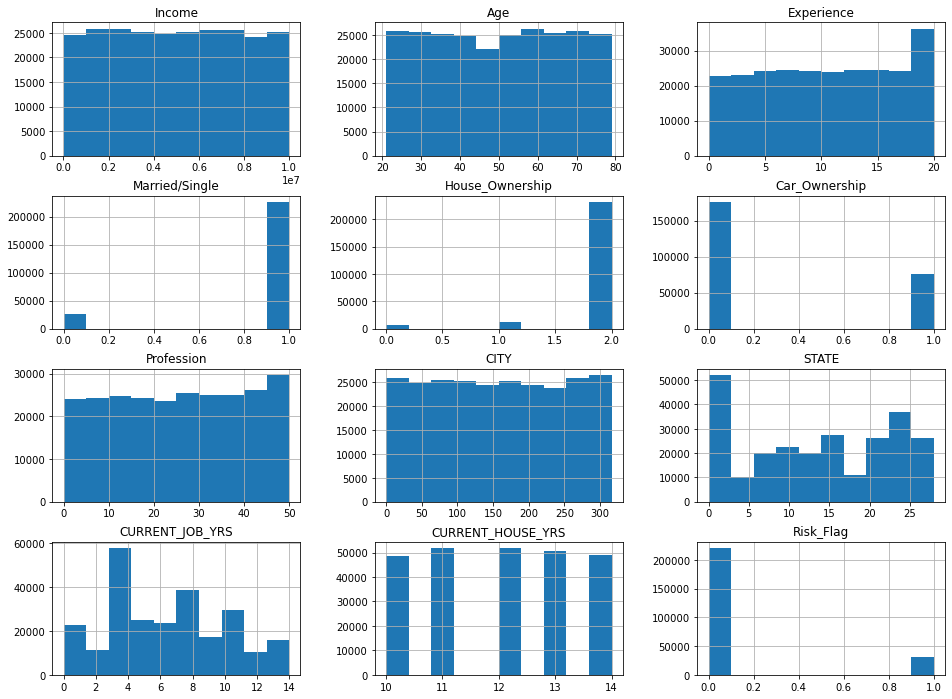

In [9]:
# visualizing the distribution of all features and the target
df.hist(figsize=(16,12))
plt.show()

In [10]:
df['Risk_Flag'].value_counts()

# baseline model if guess all not defaulters
df['Risk_Flag'].value_counts()[0]/df['Risk_Flag'].count()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

0.877

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Income,1.000000,-0.000652,0.006422,0.002682,0.016433,0.004068,0.000725,-0.001919,-0.004067,0.007045,-0.002397,-0.003091
Age,-0.000652,1.000000,-0.001118,-0.005323,-0.009820,0.009395,-0.008551,0.002104,-0.004985,0.002154,-0.020134,-0.021809
Experience,0.006422,-0.001118,1.000000,-0.001752,-0.007912,0.007519,0.000975,-0.025703,-0.001251,0.646098,0.019309,-0.034523
Married/Single,0.002682,-0.005323,-0.001752,1.000000,-0.022501,0.001206,-0.007534,0.012280,-0.009477,0.004251,-0.007539,0.021092
House_Ownership,0.016433,-0.009820,-0.007912,-0.022501,1.000000,-0.001233,0.001242,-0.014447,-0.007792,-0.009790,-0.005618,0.023622
Car_Ownership,0.004068,0.009395,0.007519,0.001206,-0.001233,1.000000,0.011887,0.001648,0.026000,0.011099,0.000251,-0.024036
Profession,0.000725,-0.008551,0.000975,-0.007534,0.001242,0.011887,1.000000,0.018852,0.001557,-0.004536,0.001954,-0.004900
CITY,-0.001919,0.002104,-0.025703,0.012280,-0.014447,0.001648,0.018852,1.000000,-0.038040,-0.027353,-0.010654,0.004575
STATE,-0.004067,-0.004985,-0.001251,-0.009477,-0.007792,0.026000,0.001557,-0.038040,1.000000,0.008745,0.007281,-0.003401
CURRENT_JOB_YRS,0.007045,0.002154,0.646098,0.004251,-0.009790,0.011099,-0.004536,-0.027353,0.008745,1.000000,0.005372,-0.016942


<AxesSubplot:>

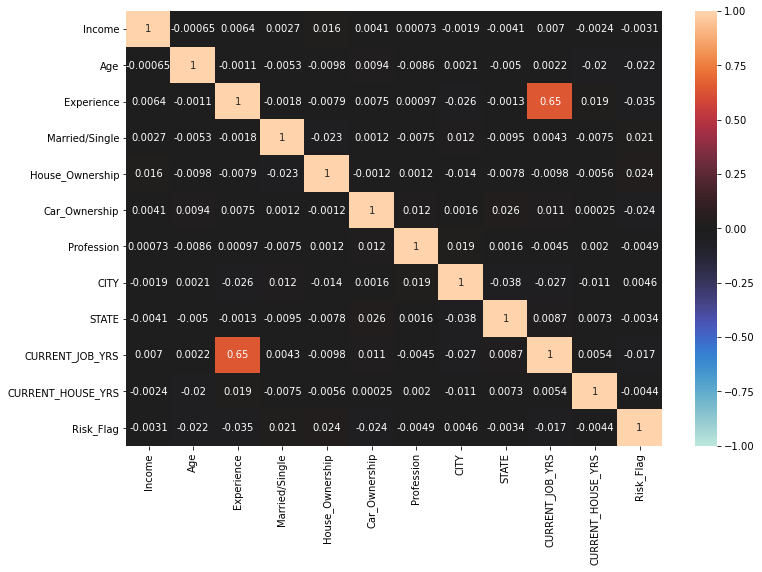

In [11]:
df.corr()
plt.rcParams['figure.figsize'] = (12,8)
sns.heatmap(df.corr(),vmin=-1, vmax=1, center=0, annot=True)

## Decision Tree

In [12]:
y = df['Risk_Flag'] == 1
X = df.drop('Risk_Flag',axis=1)
y.head()
X.head()

0    False
1    False
2    False
3     True
4     True
Name: Risk_Flag, dtype: bool

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,1,2,0,33,251,13,3,13
1,7574516,40,10,1,2,0,43,227,14,9,13
2,3991815,66,4,0,2,0,47,8,12,4,10
3,6256451,41,2,1,2,1,43,54,17,2,12
4,5768871,47,11,1,2,0,11,296,22,3,14


In [13]:
# Split train test data
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=100 ,test_size=0.08)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
predictions = dt.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

DecisionTreeClassifier()

0.8828869047619048

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.93      0.93      0.93     17646
        True       0.53      0.54      0.54      2514

    accuracy                           0.88     20160
   macro avg       0.73      0.74      0.73     20160
weighted avg       0.88      0.88      0.88     20160



AUC score:  0.8524208668112767


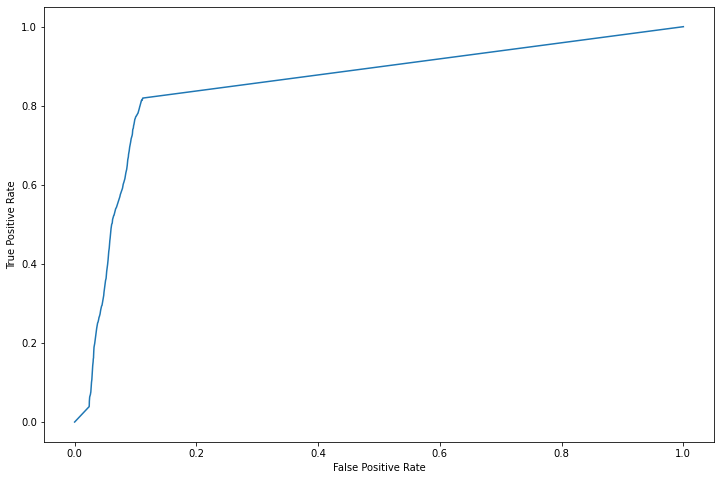

In [15]:
# Plotting ROC Graph
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import RocCurveDisplay
y_score = dt.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=dt.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

print('AUC score: ',roc_auc_score(y_test,dt.predict_proba(X_test)[:,1])) 

## Optimization using GridSearch

In [16]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=100)

parameters = {
        'min_samples_leaf':range(1,4),
        'min_samples_split':range(2,6) 
}

scorer = make_scorer(accuracy_score)
grid_obj = GridSearchCV(clf, parameters, scoring=scorer, cv=20,n_jobs=-1)
grid_fit = grid_obj.fit(X_train, y_train)

pd.concat([pd.DataFrame(grid_fit.cv_results_["params"]),pd.DataFrame(grid_fit.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
best_clf = grid_fit.best_estimator_
best_clf.fit(X_train, y_train)
best_test_predictions = best_clf.predict(X_test)


accuracy_score(y_test,best_test_predictions)

,min_samples_leaf,min_samples_split,Accuracy
0,1,2,0.881008
1,1,3,0.882682
2,1,4,0.882518
3,1,5,0.882967
4,2,2,0.886314
5,2,3,0.886314
6,2,4,0.886314
7,2,5,0.886603
8,3,2,0.885253
9,3,3,0.885253


DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=5,
                       random_state=100)

0.8870039682539682

In [17]:
y_score = dt.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=dt.classes_[1])

print('AUC score: ',roc_auc_score(y_test,dt.predict_proba(X_test)[:,1])) 

AUC score:  0.8524208668112767


## Prevent overfitting

In [18]:
y = df['Risk_Flag'] == 1
X = df.drop(['CITY','STATE','Risk_Flag'],axis=1)
y.head()
X.head()

0    False
1    False
2    False
3     True
4     True
Name: Risk_Flag, dtype: bool

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,1,2,0,33,3,13
1,7574516,40,10,1,2,0,43,9,13
2,3991815,66,4,0,2,0,47,4,10
3,6256451,41,2,1,2,1,43,2,12
4,5768871,47,11,1,2,0,11,3,14


DecisionTreeClassifier()

0.8807043650793651

AUC score:  0.8547511697161655


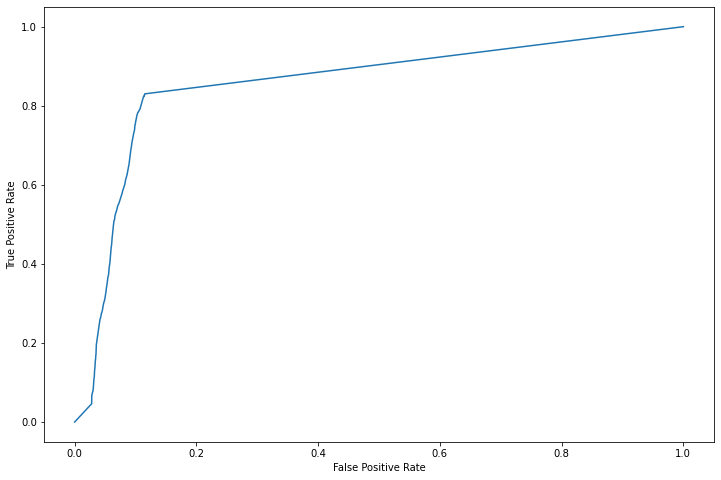

In [19]:
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=100 ,test_size=0.08)

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
predictions = dt.predict(X_test)

accuracy_score(y_test,predictions)

y_score = dt.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=dt.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

print('AUC score: ',roc_auc_score(y_test,dt.predict_proba(X_test)[:,1]))

In [20]:
clf = DecisionTreeClassifier(random_state=100)

parameters = {
        'min_samples_leaf':range(1,4),
        'min_samples_split':range(2,6) 
}

scorer = make_scorer(accuracy_score)
grid_obj = GridSearchCV(clf, parameters, scoring=scorer, cv=20,n_jobs=-1)
grid_fit = grid_obj.fit(X_train, y_train)

pd.concat([pd.DataFrame(grid_fit.cv_results_["params"]),pd.DataFrame(grid_fit.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
best_clf = grid_fit.best_estimator_
best_clf.fit(X_train, y_train)
best_test_predictions = best_clf.predict(X_test)


accuracy_score(y_test,best_test_predictions)

,min_samples_leaf,min_samples_split,Accuracy
0,1,2,0.881504
1,1,3,0.883299
2,1,4,0.883355
3,1,5,0.884075
4,2,2,0.886676
5,2,3,0.886676
6,2,4,0.886676
7,2,5,0.887082
8,3,2,0.886159
9,3,3,0.886159


DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=5,
                       random_state=100)

0.8857638888888889

## KNN Classifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier
y = df['Risk_Flag'] == 1
X = df.drop('Risk_Flag',axis=1)
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=100 ,test_size=0.08)
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

In [22]:
knnpredictions = knn_model.predict(X_test)
accuracy_score(y_test, knnpredictions)

0.8894841269841269

In [23]:
print(classification_report(y_test,knnpredictions))


              precision    recall  f1-score   support

       False       0.93      0.95      0.94     17646
        True       0.57      0.48      0.52      2514

    accuracy                           0.89     20160
   macro avg       0.75      0.71      0.73     20160
weighted avg       0.88      0.89      0.89     20160



In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn_params = {"n_neighbors": np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=5)
knn_cv.fit(X_train, y_train)
print("Best score: " + str(knn_cv.best_score_))
print("Best params: " + str(knn_cv.best_params_))

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

Best score: 0.892274844720497
Best params: {'n_neighbors': 16}


## Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

ranformodel = RandomForestClassifier(criterion='gini', bootstrap=True, random_state=100)
y = df['Risk_Flag'] == 1
X = df.drop('Risk_Flag',axis=1)
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=100 ,test_size=0.08)

ranformodel.fit(X, y)
ranforpred = ranformodel.predict(X_test)
accuracy = ranformodel.score(X_test, y_test)
accuracy

RandomForestClassifier(random_state=100)

0.9342757936507936

In [26]:
print(classification_report(y_test,ranforpred))

              precision    recall  f1-score   support

       False       0.97      0.96      0.96     17646
        True       0.73      0.76      0.74      2514

    accuracy                           0.93     20160
   macro avg       0.85      0.86      0.85     20160
weighted avg       0.94      0.93      0.93     20160



## Summary and Findings
- Decision Classifier, KNN Classifier and Random Forest Classifier was used as the relationship between the features and the target are unknown from the EDA, thus logistic regression was not used
- The best model is the random forest classifier with 0.934 accuracy
- The KNN classifier has an accuracy of 0.892 after using GridSearchCV with n=16
- Decision Classifier has the accuracy of 0.887 with an AUC score of 0.857
- All three models have a higher accuracy than the baseline model which was 0.877

# Results

In [65]:
test_df = pd.read_csv('Test Data.csv')
test_df.head()

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [66]:
# Change categorical data to numerical
label_encoder = LabelEncoder()
test_df['Married/Single'] = label_encoder.fit_transform(test_df['Married/Single']) 
test_df['House_Ownership'] = label_encoder.fit_transform(test_df['House_Ownership'])
test_df['Car_Ownership'] = label_encoder.fit_transform(test_df['Car_Ownership'])
test_df['Profession'] = label_encoder.fit_transform(test_df['Profession'])
test_df['CITY'] = label_encoder.fit_transform(test_df['CITY'])
test_df['STATE'] = label_encoder.fit_transform(test_df['STATE'])
test_df.head()

pred_df = test_df.drop('ID',axis=1)


,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,1,2,0,26,181,28,4,13
1,2,1215004,25,5,1,2,0,24,131,14,5,10
2,3,8901342,50,12,1,2,0,30,290,14,9,14
3,4,1944421,49,9,0,2,1,1,171,14,3,12
4,5,13429,25,18,1,2,1,12,39,28,13,11


In [67]:
results = ranformodel.predict(pred_df)
results = list(map(int, results))

test_df['Risk_Flag'] = results


In [68]:
submission = test_df[['ID','Risk_Flag']]
submission.head()

,ID,Risk_Flag
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [69]:
submission.to_csv("submission",index=False)